第十六章 霍夫变换

霍夫变换是一种在图像中寻找直线、圆形以及其他简单形状的方法。
直线：cv2.HoughLines();cv2.HoughLinesP();
圆：cv2.HoughCircles()

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)
    #plt.imshow(q,cmap = plt.cm.gray),plt.axis('off'),用于正确显示灰度图
    #plt.figure(figsize=(10,10)),用于放大，这样子是放大十倍，但只是放大显示，不是放大图像本身

In [2]:
#霍夫变换原理：x轴：直线斜率；y轴：直线截距；
#霍夫变换将直线映射为一个点，将点映射为直线。
#由于两点就能构成一条直线，因而当一个点计算出错时，就很有可能产生一条错误的直线，这是我们希望避免的
#因此，我们选择（笛卡尔坐标系中的）直线应该选择有尽可能多直线交汇的（霍夫空间中的）点

#对于斜率为正无穷的直线，无法映射到霍夫空间中；可以先映射到极坐标系，再映射到霍夫空间。

(<matplotlib.axes._subplots.AxesSubplot at 0x211420a7fd0>,
 (-0.5, 459.5, 459.5, -0.5))

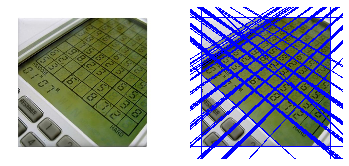

In [10]:
#cv2.HoughLines()检测直线
#lines = cv2.HoughLines(image,rho,theta,threshold)
#image : 8位单通道二值图像,所以要记得阈值处理，或者做一个Canny边缘检测
#rho ：以像素为单位的距离r的精度，一般是1
#theta: 角度θ的精度，一般是π/180，表示搜索所有可能的角度
#threshold：阈值，表示判断为直线所需通过的最少点数（笛卡尔坐标系视角），越小直线越多
#lines:返回值，是一对浮点数，表示检测到的直线的参数（r,θ）,可以理解为极坐标，是numpy.ndarray类型

img = cv2.imread('computer.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3) #先做一个Canny边缘检测，保证图像编程二值单通道图像
orgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #matplot默认是RGB色彩空间
oShow = orgb.copy() #深拷贝
lines = cv2.HoughLines(edges,1,np.pi/180,140)
#print(lines)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*a)
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*a)  #两点确定一条直线，取1000确保画出来的线段够长
    cv2.line(orgb,(x1,y1),(x2,y2),(0,0,255),2)
plt.subplot(121),plt.imshow(oShow),plt.axis('off')
plt.subplot(122),plt.imshow(orgb),plt.axis('off')

(84, 1, 4)


(<matplotlib.axes._subplots.AxesSubplot at 0x211428d1a20>,
 (-0.5, 919.5, 919.5, -0.5))

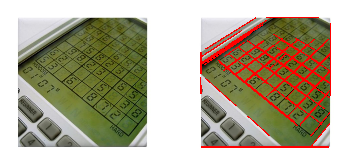

In [18]:
#使用霍夫变换可能将图像中有限个点碰巧对其的非直线关系检测为直线
#为了避免这种情况，可以使用概率霍夫变换
#lines = cv2.HoughLinesP(image,rho,theta,threshold,minLineLength,maxLineGap)
#minLineLength: 用来控制 接受直线的最小长度 ，一般设为0
#maxLineGap : 用来控制接受共线线段之间的最小间隔，超过间隔的两个点（霍夫空间），认为是两条直线（笛卡尔，）一般设为0
img = cv2.imread('computer.jpg',-1)
img = cv2.pyrUp(img)  #原图像效果不好，因此将其放大了一倍
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
orgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
oShow = orgb.copy()
lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength = 100,maxLineGap=10)
print(lines.shape)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(orgb,(x1,y1),(x2,y2),(255,0,0),5)
plt.subplot(121),plt.imshow(oShow),plt.axis('off')
plt.subplot(122),plt.imshow(orgb),plt.axis('off')

[[[330 450 142]
  [646 468 153]
  [476 174 121]]]
(1, 3, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x211428f4518>,
 (-0.5, 887.5, 653.5, -0.5))

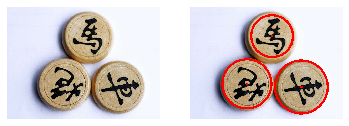

In [19]:
#霍夫圆环变换
#实际上，任意能用参数方程表示的对象，都能用霍夫变换来检测
#circles = cv2.HoughCircles(image,method,dp,minDist,param1,param2,minRadius,maxRadius)
#method : 目前只用HOUGH_GRADIENT
#dp : 累计器分辨率，它是一个分割比率，用来指定图像分辨率与圆心累加器分辨率的比例，如果dp=1则两者相等
#minDist: 圆心间的最小间距
#param1 : Canny检测的高阈值，缺省值为100，低阈值为高阈值的一半
#param2 : 圆心位置必须收到的投票数
#minRadius:圆半径的最小值
#maxRadius:圆半径的最大值
#circles : 圆心坐标和半径构成的numpy.ndarray，注意圆心坐标是x,y两个坐标
#特别注意，使用圆环变换之前，需要先进性平滑处理，即滤波，来减少噪声
img = cv2.imread('chess.jpg',0)
imgo = cv2.imread('chess.jpg',-1)
o = cv2.cvtColor(imgo,cv2.COLOR_BGR2RGB)
oshow = o.copy()
img = cv2.medianBlur(img,5) #中值滤波
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,300,param1= 50,param2 = 30,minRadius=100,maxRadius=200)
circles = np.uint16(np.around(circles))
print(circles)
print(circles.shape)
for i in circles[0,:]:
    cv2.circle(o,(i[0],i[1]),i[2],(255,0,0),12)
    cv2.circle(o,(i[0],i[1]),2,(255,0,0),12)      #大概点下圆心位置
plt.subplot(121),plt.imshow(oshow),plt.axis('off')
plt.subplot(122),plt.imshow(o),plt.axis('off')